#### Check Point 1:

1. Import data sets and Load data set
Hint: Make use of with statement and write a function to load the data if you are
not able to load through the panda's method.

In [1]:
import pandas as pd
t=open('bank.csv','r').read().replace('\"','') # opening the csv file, reading it and making 
                                               # modifications in the text
open('bank.csv','w').write(t) # writing the modified text into the csv file
df=pd.read_csv('bank.csv',sep=';') # reading the csv file using ';' as separator into a dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


2. Make the data proper to make use of data for analysis 
 
A. Identify the Features data types before entering into the analysis

In [13]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

  B. Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once.

In [ ]:
# As we can see in the previous solution, there are no wrongly itendified datatypes in the data set.

C. Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.

In [41]:
df.isna().sum() # finding the sum of all NaN values

# Hence, there are no missing values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

D.  Find duplicates (if necessary)

In [42]:
df.duplicated().sum() # finding the sum of all duplicate records

# Hence, there are no duplicates.

0

#### Check Point 2:

3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

Average balance of subscribed customers = 1571.96 euros
Average balance of non-subscribed customers = 1403.21 euros


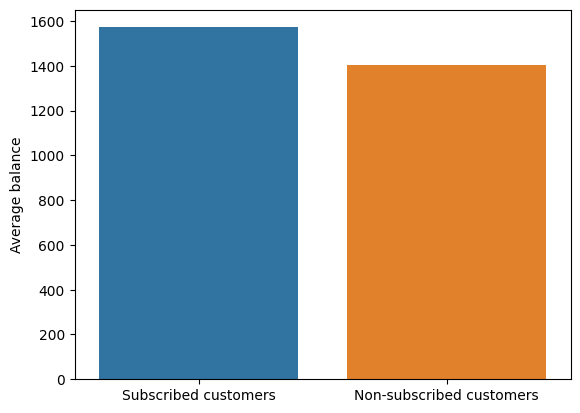

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
bs=df[df.y=='yes'].balance.mean() # finding mean balance of subscribed customers
bn=df[df.y=='no'].balance.mean() # finding mean balance of non-subscribed customers
print('Average balance of subscribed customers =',round(bs,2),'euros')
print('Average balance of non-subscribed customers =',round(bn,2),'euros')
sns.barplot(x=['Subscribed customers','Non-subscribed customers'],y=[bs,bn])
plt.ylabel('Average balance') # setting label for y-axis of the plot
plt.show()

4. Use a pie plot to find the distribution(frequency) of the education. Make sure to
add labels and show the percentage of each education distribution.

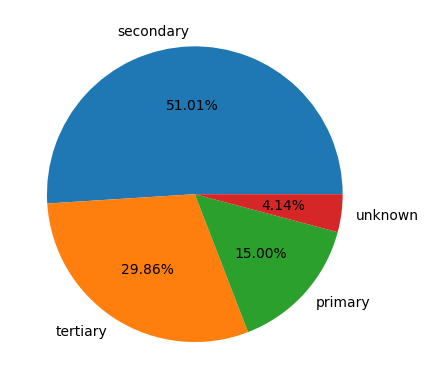

In [69]:
plt.pie(df.education.value_counts(),labels=df.education.value_counts().index,autopct='%.2f%%')
# finding the count of each type of education and plotting a pie chart

plt.show()

5. Create a function that should be able to create a new feature(Variable) called
season using the month column. 

In [11]:
def season(m): # function which returns the season name according to month name passed
    if m in ['dec','jan','feb']:
        return 'winter'
    if m in ['mar','apr','may']:
        return 'spring'
    if m in ['jun','jul','aug','sep']:
        return 'summer'
    return 'autumn'
df['season']=df.month.apply(season) # using 'season' function to create the season column
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,spring


6. Use the count plot with a variable that you created in the above question and
also the Y variable to find the class distribution.

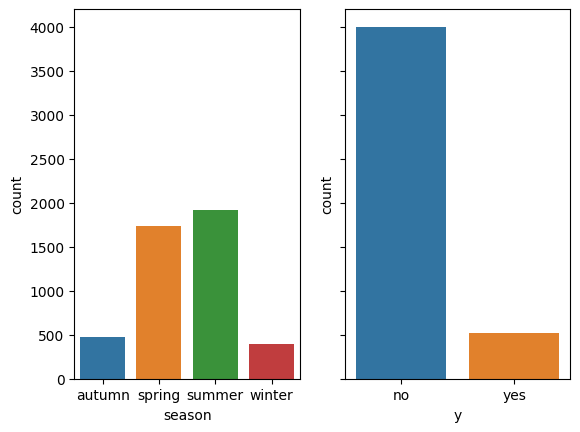

In [12]:
f,(p1,p2)=plt.subplots(1,2,sharey=True) # creating subplots with 1 row and 2 columns with y-axis 
                                        # shared among the plots 
sns.countplot(x=df.season,ax=p1) # plotting count of all seasons on 'p1' axes
sns.countplot(x=df.y,ax=p2) # plotting count of values in 'y' column on 'p2' axes
plt.show()

7. Use the Pdays feature and find does it cause any effect on the subscription of the
term using the bar plot.

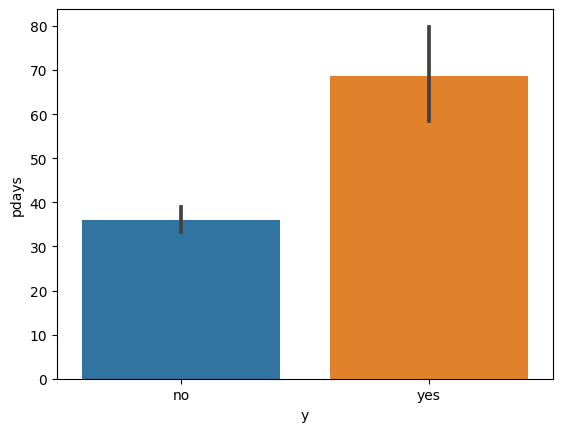

In [12]:
sns.barplot(x=df.y,y=df.pdays) # plotting bar graph between 'y' and 'pdays' columns
plt.show()

8. Replace the -1 as nan values for the P-days store.

In [5]:
import numpy as np
df.pdays.replace(-1,np.nan,True) # replacing -1 with NaN in 'pdays' column in place
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,spring


9. Once you are done with question number 8, do the same analysis as question
number 7. And observe the difference between question number 7 and question
number 9.

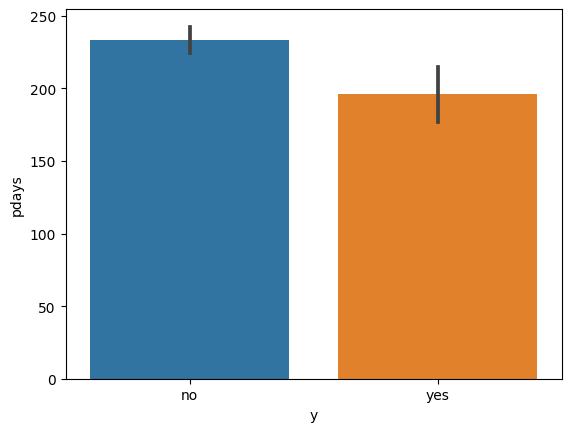

In [29]:
sns.barplot(x=df.y,y=df.pdays) # plotting bar graph between 'y' and 'pdays' columns
plt.show()

# We can observe that now the 'pdays' axis of the graph takes more no. of days into account and the 
# subscription is more for recently contacted clients.

10. Does the customer take the term subscription who has less than 0 balance?
Hint: Use any kind of plot which would you the related information to this question. 

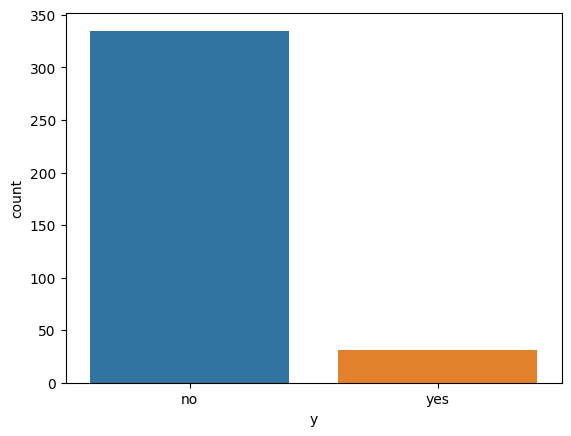

In [34]:
sns.countplot(x=df[(df.balance<0)].y) # plotting counts of subscribed and non-subscribed customers 
                                      # who have negative balance
plt.show()

# As we can see, some customers who have less than 0 balance have taken the term subscription.

11. Use Pivot table to find the maximum balance for each type of job.

In [16]:
df.pivot_table(index=df.job,aggfunc='max').balance # pivoting 'job' column and finding maximum balance

job
admin.           22171
blue-collar      16353
entrepreneur     42045
housemaid        26965
management       27359
retired          71188
self-employed    16430
services         26394
student          11555
technician       27733
unemployed        9019
unknown           7337
Name: balance, dtype: int64

12. Use the Age, balance, and Y column to plot the scatter plot and find what kind
of relationship Age and balance had, and See the points which belong 0 and 1 class
and how they are distributed.

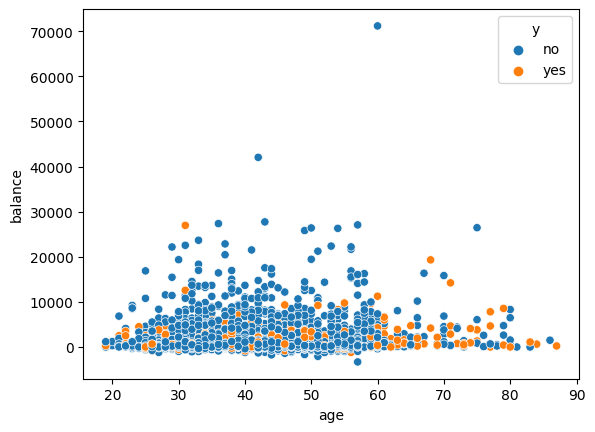

In [19]:
sns.scatterplot(x=df.age,y=df.balance,hue=df.y) # plotting scatter plot with hue as 'y' column values
plt.show()

# We can see that balance increases with age till around the middle of the age range in the graph and 
# then starts decreasing.
# We can also observe that there are more subscribers than non-subscribers at the age of 60 and above.

13. Use the violin plot and also the box plot to find the distribution of the balance
for each class of the Y column. And try to tell why we have a Violin plot and Box
plot both rather than one.

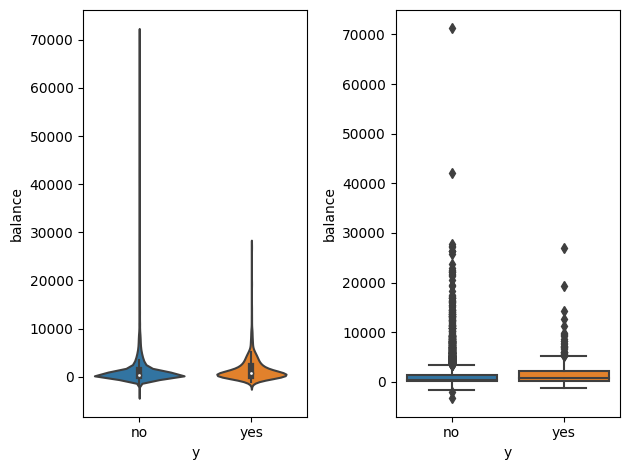

In [21]:
f,(p1,p2)=plt.subplots(1,2) # creating subplots with 1 row and 2 columns
sns.violinplot(x=df.y,y=df.balance,ax=p1) # plotting violin plot on 'p1' axes
sns.boxplot(x=df.y,y=df.balance,ax=p2) # plotting box plot on 'p2' axes
plt.tight_layout() # adjusting space between the plots
plt.show()

# We have both violin plot and box plot because while the violin plot is more informative and shows 
# the full distribution of the data, the box plot shows outliers more distinctly. 

14. Use a pie plot to know the Proportion(distribution) of the defaulters and nondefaulters.
Note: Try to explore more parameters that are there in the pie-plot method.

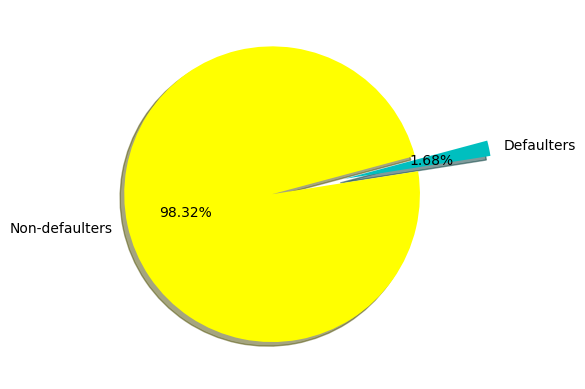

In [95]:
plt.pie(df.default.value_counts(),[0,.5],['Non-defaulters','Defaulters'],['yellow','c'],'%.2f%%',
        shadow=True,startangle=15) # plotting pie chart of count of values in 'default' column
                                   # exploding slice of defaulters with an offset of .5
                                   # specifying yellow and cyan colors for the chart
                                   # placing shadows in the chart and rotating it by 15 degrees
plt.show()

15. Use Box plot and strip plot to know the distribution of the Pdays with respect to
Y classes and differentiate both plots.

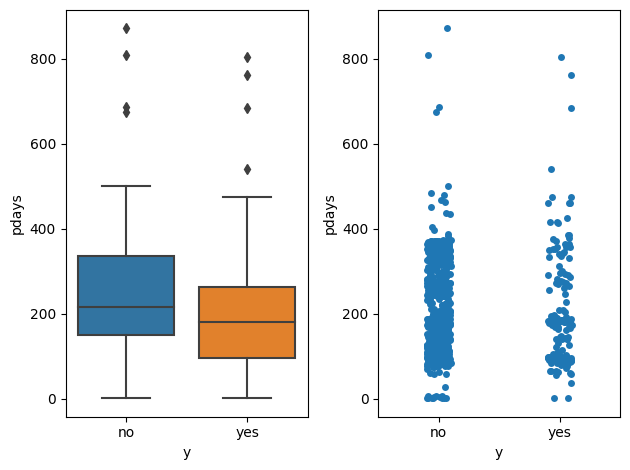

In [98]:
f,(p1,p2)=plt.subplots(1,2) # creating subplots with 1 row and 2 columns
sns.boxplot(x=df.y,y=df.pdays,ax=p1) # plotting box plot on 'p1' axes
sns.stripplot(x=df.y,y=df.pdays,ax=p2) # plotting strip plot on 'p2' axes
plt.tight_layout() # adjusting space between the plots
plt.show()

# We can see that in the box plot, it is easier to spot the outliers of the data than in the strip 
# plot. Also, the strip plot displays the concentration of data at different points whereas the box
# plot does not.